### TP 3: Visión por Computadora

Alumnos: Fabricio Lopretto (a1616), Santiago José Olaciregui (a1611)

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

1. Obtener una detección del logo en cada imagen sin falsos positivos

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [1]:
# Instala las librerias necesarias
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importa las librerias necesarias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [3]:
# Capta la ruta de la notebook
ruta_notebook = os.getcwd()

# Ruta a las imagenes
images_path = ruta_notebook + '/images/'

# Ruta a las imagenes binarias preprocesadas
images_canny_path = ruta_notebook + '/images_canny/'

In [4]:
# Ruta de las imagenes
images = [
    'coca_logo_1.png',
    'coca_logo_2.png',
    'coca_multi.png',
    'coca_retro_1.png',
    'coca_retro_2.png',
    'COCA-COLA-LOGO.jpg',
    'logo_1.png'
    ]

Se preprocesan las imagenes a traves del algoritmo de canny:

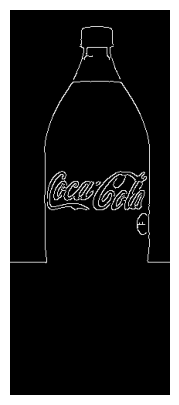

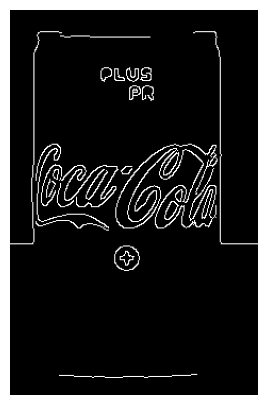

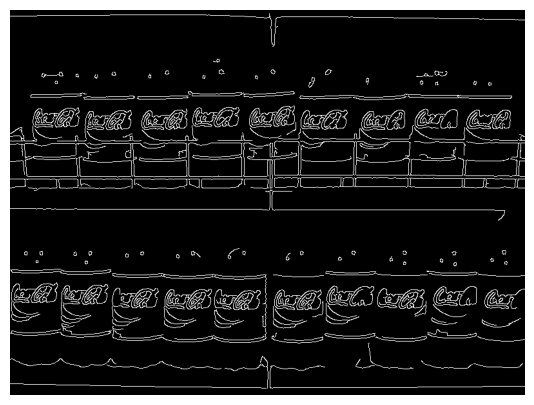

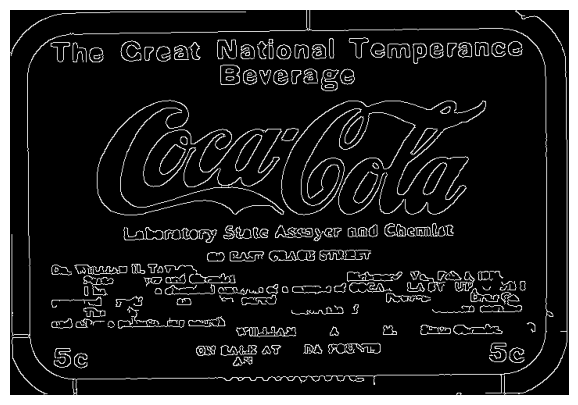

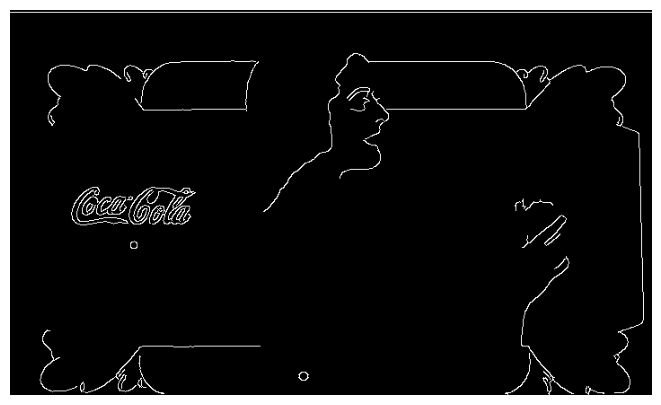

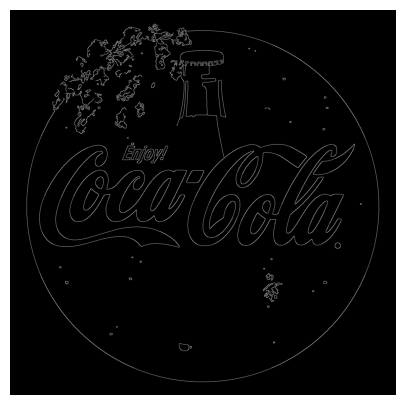

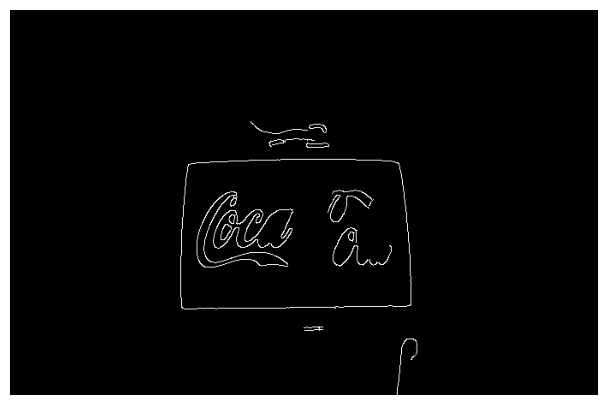

In [5]:
# Inicializa contador
num = int(0)

# Recorre las siete imagenes 
for img in images:

    # Cargar la imagen
    image = cv.imread(images_path + img)

    # Convierte la imagen a escala de grises
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Aplica el filtro Gaussiano para suavizar la imagen
    blurred_image = cv.GaussianBlur(gray_image, (5, 5), 1.5)

    # Aplica el detector de bordes de Canny
    edges = cv.Canny(blurred_image, threshold1=100, threshold2=350)

    # Mustra la imagen de bordes
    plt.figure(figsize=(10, 5))
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    cv.imwrite(images_canny_path + 'canny_' + img, edges)

    # Incrementa contador
    num += 1


Observaciones:

Se utiliza un filtro gaussiano sobre las imagenes en un intento para disminuir los contrastes que no pertenecen al logo buscado. Luego, se aplica un filtro de canny para identificar los bordes en las imagenes. Lo más desafiante, fue encontrar parámetros en estos para eliminar el hielo en la imagen "COCA-COLA-LOGO" y y el resto de texto en la imagen "coca_retro_1" sin perder el logo en las demás imagenes.

Si bien se buscó modificar el tamaño del kernel en el filtro gaussiano y los umbrales de derivadas direccionales sobre el filtro de canny, no se pudo encontrar un balance del todo apropiado.

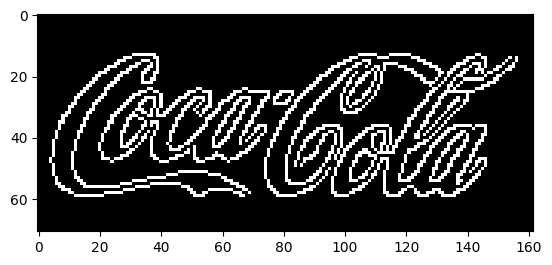

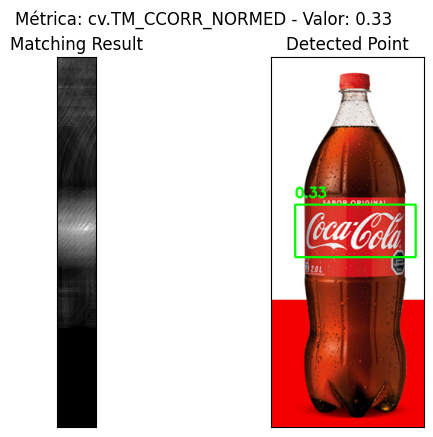

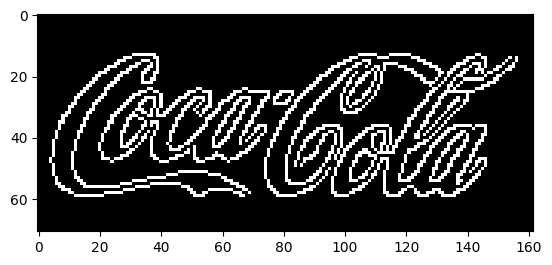

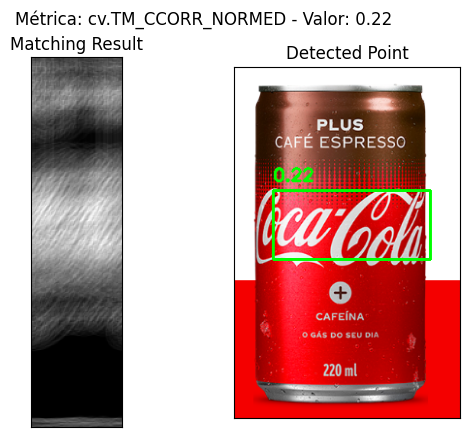

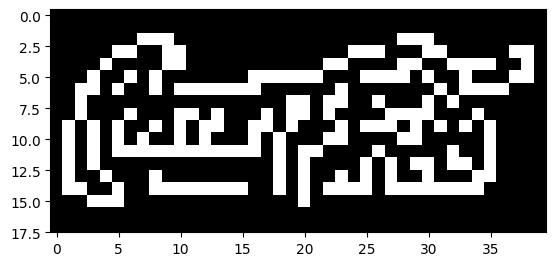

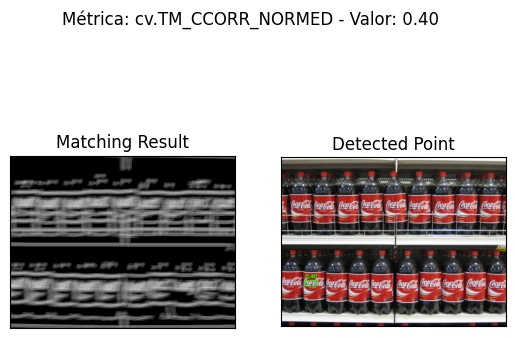

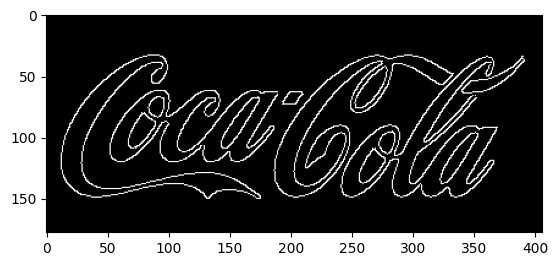

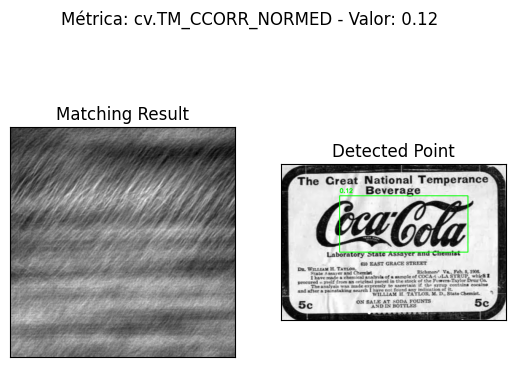

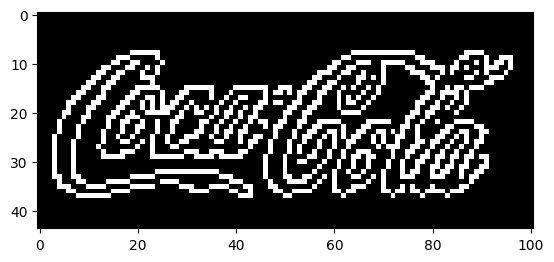

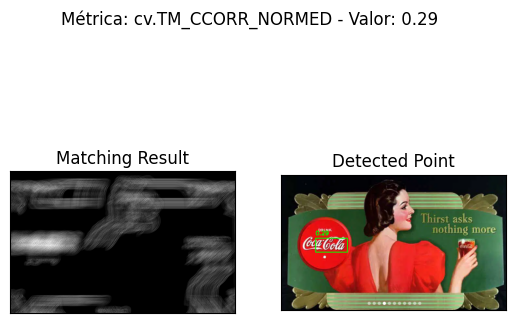

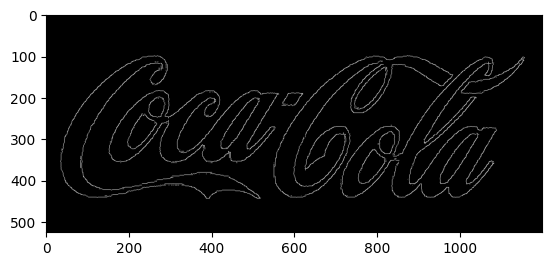

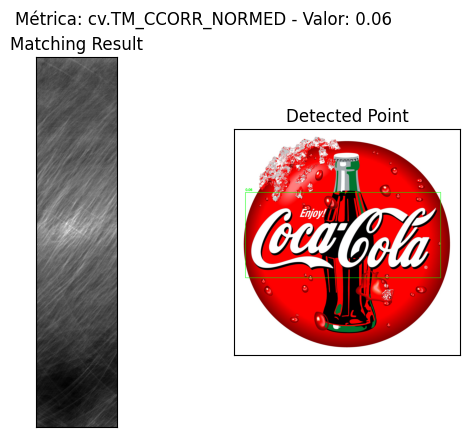

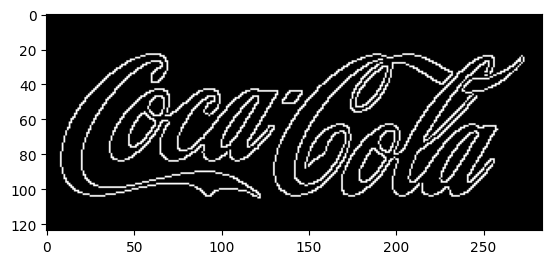

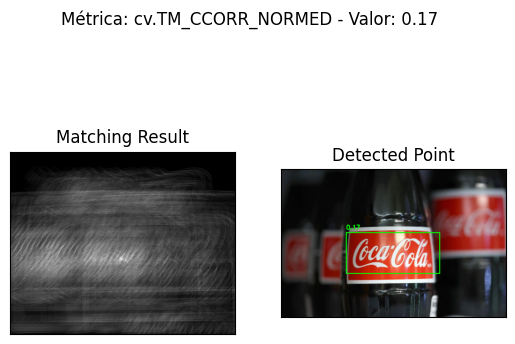

In [7]:
# Define la funcion de deteccion
def deteccion_individual(name_imagen_original):
    """
    Identifica a traves de Template Matching el logo
    en la imagen ingresada, previo preprocesamiento
    del template y de la imagen.

    Parámetros:
    name_ruta_imagen_original: nombre del archivo de la imagen original.
    """

    # Define el metodo con el cual hacer el matching
    meth = 'cv.TM_CCORR_NORMED'

    # Ruta de la notebook
    ruta_notebook = os.getcwd()
    # Ruta a las imagenes
    images_path = ruta_notebook + '/images/'
    # Ruta al template
    template_path = ruta_notebook + '/template/'
    # Ruta a las imagenes binarias preprocesadas
    images_canny_path = ruta_notebook + '/images_canny/'
    # Ruta a las imagenes con detecciones
    images_detect_path = ruta_notebook + '/images_detections/matching/'

    # Define los tamaños de template a utilizar
    ruta_template = {'coca_logo_1.png':'pattern_2.png',
                'coca_logo_2.png':'pattern_2.png',
                'coca_multi.png':'pattern_0.png',
                'coca_retro_1.png':'pattern_6.png',
                'coca_retro_2.png':'pattern_1.png',
                'COCA-COLA-LOGO.jpg':'pattern_19.png',
                'logo_1.png':'pattern_4.png'}

    # Define las imagenes binarias a utilizar
    ruta_canny = {'coca_logo_1.png':'canny_coca_logo_1.png',
                'coca_logo_2.png':'canny_coca_logo_2.png',
                'coca_multi.png':'canny_coca_multi.png',
                'coca_retro_1.png':'canny_coca_retro_1.png',
                'coca_retro_2.png':'canny_coca_retro_2.png',
                'COCA-COLA-LOGO.jpg':'canny_COCA-COLA-LOGO.png',
                'logo_1.png':'canny_logo_1.png'}
    
    # Visualiza el template en escala de grises
    template = cv.imread(template_path + ruta_template[name_imagen_original],0)

    # Aplica el filtro Canny al template
    template_canny = cv.Canny(template, 50, 150)

    # Muestra el template con Canny aplicado
    plt.figure()
    plt.imshow(template_canny, cmap='gray')

    # Toma las dimensiones del template
    w, h = template_canny.shape[::-1]

    # Carga la imagen original
    imagen_original = cv.imread(images_path + name_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen para la salida
    img_salida = img_ori.copy()

    # Carga la imagen binaria en escala de grises
    imagen_canny = cv.imread(images_canny_path + ruta_canny[name_imagen_original])
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)

    # Aplica la coincidencia de patrones con la imagen de bordes
    res = cv.matchTemplate(img_gray, template_canny, eval(meth))

    # Encuentra los valores maximos y minimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Toma el maximo
    top_left = max_loc

    # Marca el lugar donde lo haya encontrado
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, (0, 255, 0), 2)

    # Añade el valor de la metrica como texto en verde
    text_position = (top_left[0], top_left[1] - 10)
    cv.putText(img_salida, f'{max_val:.2f}', text_position, cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Grafica el procesamiento y la salida
    plt.figure()     
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Métrica: {meth} - Valor: {max_val:.2f}')
    plt.savefig(images_detect_path + 'match_' + name_imagen_original, bbox_inches='tight', pad_inches=0)
    plt.show()

# Aplica la funcion a cada imagen
for imag in images:
    deteccion_individual(imag)


Observaciones:

La función realiza el Template Matching entre las imagenes binarias preprocesadas y un template con un tamaño particular utilizando de métrica el coeficiente de correlación normalizado para contar con una métrica entre 0 y 1. Las imagenes binarias son el resultado del preprocesamiento con filtros gaussiano y de canny. Estas imagenes de bordes son las utilizadas en la técnica de "template matching".

Además, a partir del algoritmo de pirámide de gaussiana se procesa el template original y se generan 20 tamaños diferentes del mismo para evaluar cual resulta mejor para cada imagen.

Ya en el algoritmo, cada imagen binaria de borde se compara con el template de tamaño acorde a ella (el template no puede ser de mayor tamaño a la imagen). Vale mencionar que al template también se le aplica un filtro de canny para resaltar sus bordes.

Luego, se guarda el valor máximo de la métrica y la ubicación de *matcheo* donde se dio el mismo. Vale mencionar que el uso del máximo se debe a la elección de la métrica: Coeficiente de Correlación Normalizado, cuyo dominio es entre 0 y 1.

Por último, se imprime sobre la imagen original la ubicación y el valor de la métrica máxima en verde (rectángulo y número respectivamente). 